# Phase 1: Preparation

In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings
np.random.seed(34)
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/x.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CM

**Define Columns**

In [18]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ 
    "(Fan inlet temperature) (◦R)",
    "(LPC outlet temperature) (◦R)",
    "(HPC outlet temperature) (◦R)",
    "(LPT outlet temperature) (◦R)",
    "(Fan inlet Pressure) (psia)",
    "(bypass-duct pressure) (psia)",
    "(HPC outlet pressure) (psia)",
    "(Physical fan speed) (rpm)",
    "(Physical core speed) (rpm)",
    "(Engine pressure ratio(P50/P2)",
    "(HPC outlet Static pressure) (psia)",
    "(Ratio of fuel flow to Ps30) (pps/psia)",
    "(Corrected fan speed) (rpm)",
    "(Corrected core speed) (rpm)",
    "(Bypass Ratio)",
    "(Burner fuel-air ratio)",
    "(Bleed Enthalpy)",
    "(Required fan speed)",
    "(Required fan conversion speed)",
    "(High-pressure turbines Cool air flow)",
    "(Low-pressure turbines Cool air flow)"
]
col_names = index_names + setting_names + sensor_names


In [19]:
df_train = pd.read_csv('/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt', sep='\s+', header=None, names=col_names)
df_test = pd.read_csv('/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt', sep='\s+', header=None, names=col_names)
df_rul = pd.read_csv('/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])


**Data Info**

In [20]:
print(df_train.head())



   engine  cycle  setting_1  setting_2  setting_3  \
0       1      1    -0.0007    -0.0004      100.0   
1       1      2     0.0019    -0.0003      100.0   
2       1      3    -0.0043     0.0003      100.0   
3       1      4     0.0007     0.0000      100.0   
4       1      5    -0.0019    -0.0002      100.0   

   (Fan inlet temperature) (◦R)  (LPC outlet temperature) (◦R)  \
0                        518.67                         641.82   
1                        518.67                         642.15   
2                        518.67                         642.35   
3                        518.67                         642.35   
4                        518.67                         642.37   

   (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  \
0                        1589.70                        1400.60   
1                        1591.82                        1403.14   
2                        1587.99                        1404.20   
3               

In [21]:
print(df_test.head())



   engine  cycle  setting_1  setting_2  setting_3  \
0       1      1     0.0023     0.0003      100.0   
1       1      2    -0.0027    -0.0003      100.0   
2       1      3     0.0003     0.0001      100.0   
3       1      4     0.0042     0.0000      100.0   
4       1      5     0.0014     0.0000      100.0   

   (Fan inlet temperature) (◦R)  (LPC outlet temperature) (◦R)  \
0                        518.67                         643.02   
1                        518.67                         641.71   
2                        518.67                         642.46   
3                        518.67                         642.44   
4                        518.67                         642.51   

   (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  \
0                        1585.29                        1398.21   
1                        1588.45                        1395.42   
2                        1586.94                        1401.34   
3               

In [22]:
print(df_rul.head())


   RUL
0  112
1   98
2   69
3   82
4   91


In [23]:
print(df_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   20631 non-null  int64  
 1   cycle                                    20631 non-null  int64  
 2   setting_1                                20631 non-null  float64
 3   setting_2                                20631 non-null  float64
 4   setting_3                                20631 non-null  float64
 5   (Fan inlet temperature) (◦R)             20631 non-null  float64
 6   (LPC outlet temperature) (◦R)            20631 non-null  float64
 7   (HPC outlet temperature) (◦R)            20631 non-null  float64
 8   (LPT outlet temperature) (◦R)            20631 non-null  float64
 9   (Fan inlet Pressure) (psia)              20631 non-null  float64
 10  (bypass-duct pressure) (psia)            20631

In [24]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   13096 non-null  int64  
 1   cycle                                    13096 non-null  int64  
 2   setting_1                                13096 non-null  float64
 3   setting_2                                13096 non-null  float64
 4   setting_3                                13096 non-null  float64
 5   (Fan inlet temperature) (◦R)             13096 non-null  float64
 6   (LPC outlet temperature) (◦R)            13096 non-null  float64
 7   (HPC outlet temperature) (◦R)            13096 non-null  float64
 8   (LPT outlet temperature) (◦R)            13096 non-null  float64
 9   (Fan inlet Pressure) (psia)              13096 non-null  float64
 10  (bypass-duct pressure) (psia)            13096

## Data Cleaning

In [25]:
df_train.dropna(axis=1, how="all", inplace=True)
df_test.dropna(axis=1, how="all", inplace=True)

# Drop rows with any NaN
df_train.dropna(axis=0, how="any", inplace=True)
df_test.dropna(axis=0, how="any", inplace=True)

# Reset index
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [26]:
print("Missing in train:", df_train.isnull().sum().sum())
print("Missing in test:", df_test.isnull().sum().sum())
print("Missing in RUL:", df_rul.isnull().sum().sum())

Missing in train: 0
Missing in test: 0
Missing in RUL: 0


In [27]:
print("Missing in train:\n", df_train.isnull().sum().sum())
print("Missing in test:\n", df_test.isnull().sum().sum())
print("Missing in RUL:\n", df_rul.isnull().sum().sum())


Missing in train:
 0
Missing in test:
 0
Missing in RUL:
 0


**Add RUL Column**

In [28]:
max_cycles_df = df_train.groupby('engine')['cycle'].max().reset_index()
max_cycles_df.columns = ['engine', 'max_cycles']

df_train = pd.merge(df_train, max_cycles_df, on='engine', how='left')
df_train['RUL'] = df_train['max_cycles'] - df_train['cycle']
df_train.drop(columns=['max_cycles'], inplace=True)
df_train['RUL'] = df_train['RUL'].clip(upper=125)

# Merge RUL for test set
df_rul['engine'] = df_rul.index + 1
df_rul = df_rul[['engine','RUL']]
df_test = pd.merge(df_test, df_rul, on='engine', how='left')

**Drop Constant Columns**

In [29]:
constant_cols = [col for col in df_train.columns if df_train[col].nunique() == 1]
print("Columns with constant values:", constant_cols)
df_train.drop(constant_cols, axis=1, inplace=True, errors='ignore')
df_test.drop(constant_cols, axis=1, inplace=True, errors='ignore')


Columns with constant values: ['setting_3', '(Fan inlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(Engine pressure ratio(P50/P2)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)']


**Exploratory Data Analysis**

In [30]:
sensor_cols = [col for col in df_train.columns if col not in ['engine', 'cycle', 'RUL']]

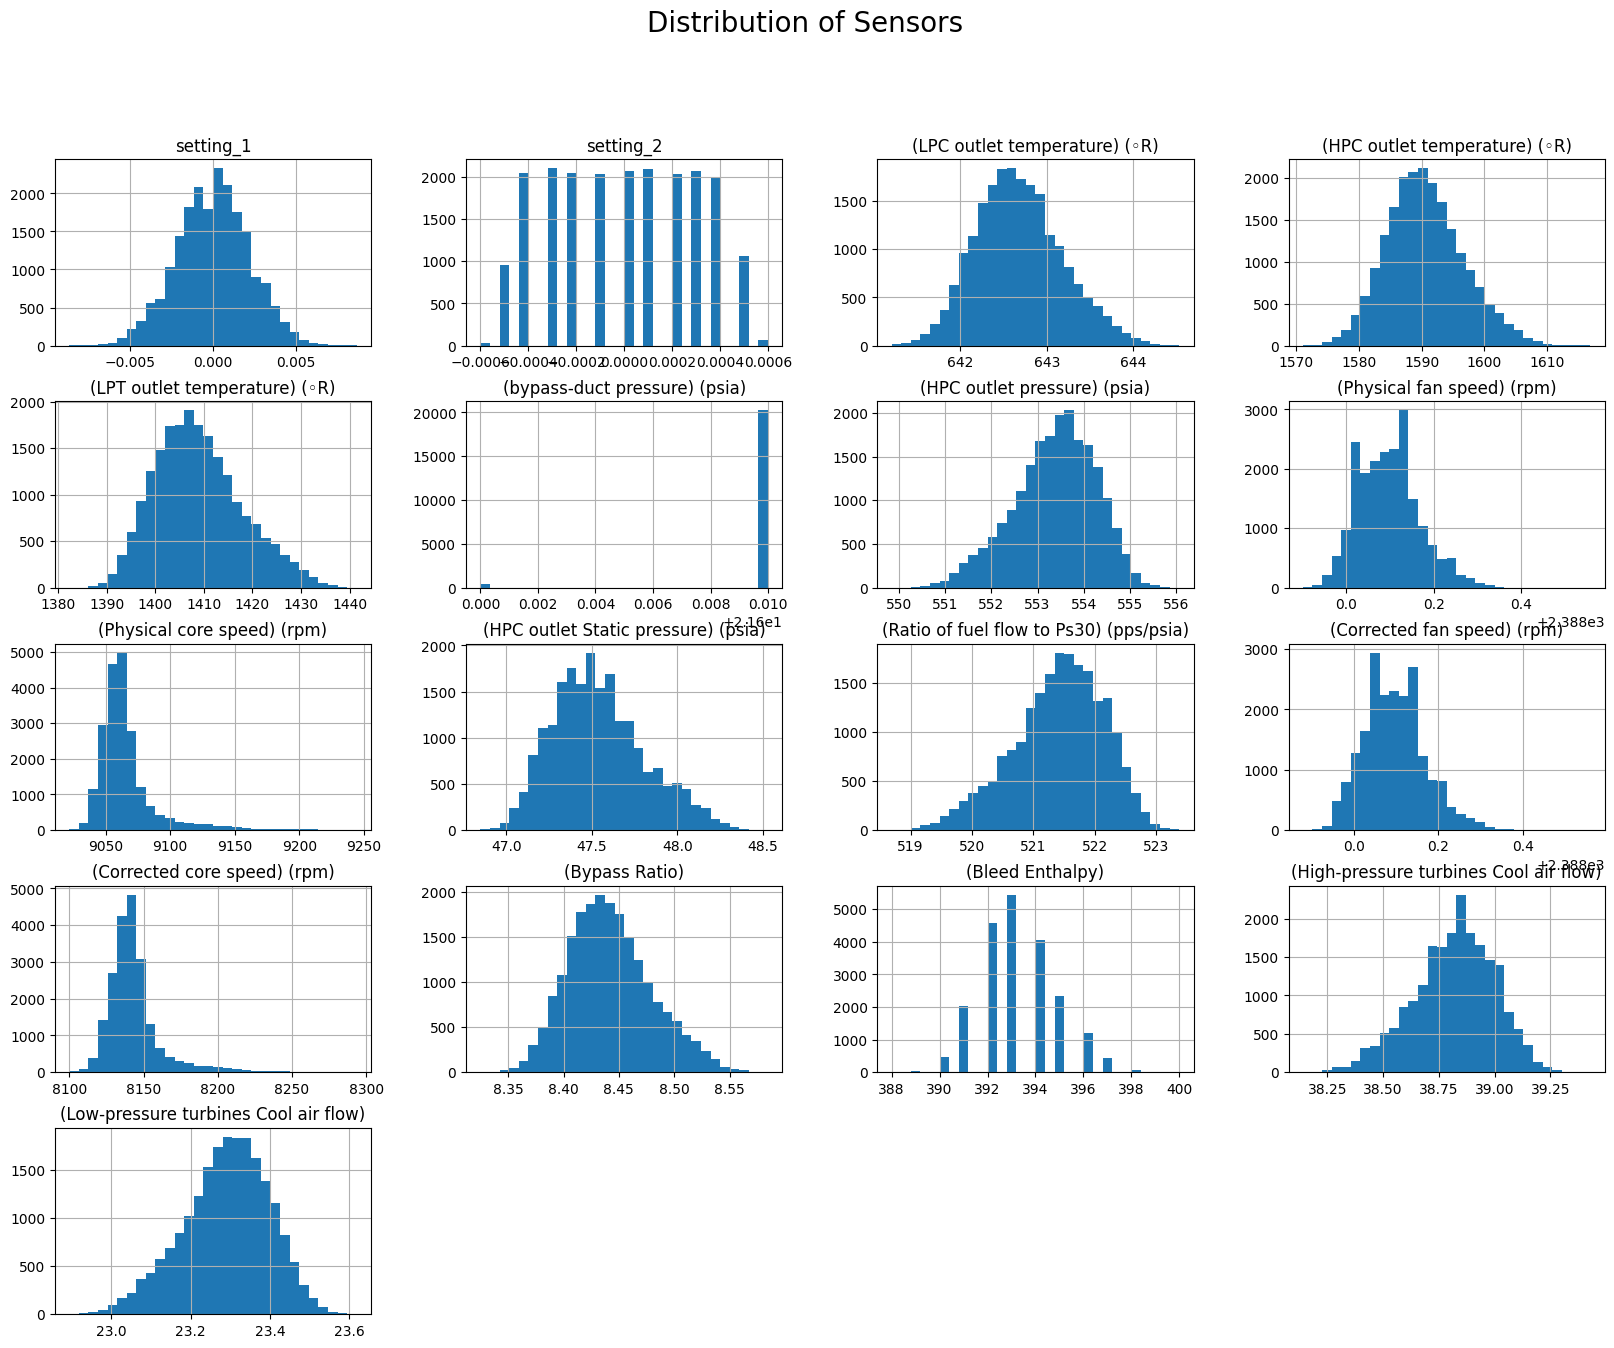

In [31]:
df_train[sensor_cols].hist(bins=30, figsize=(20,15), layout=(5,4))
plt.suptitle("Distribution of Sensors", fontsize=20)
plt.show()


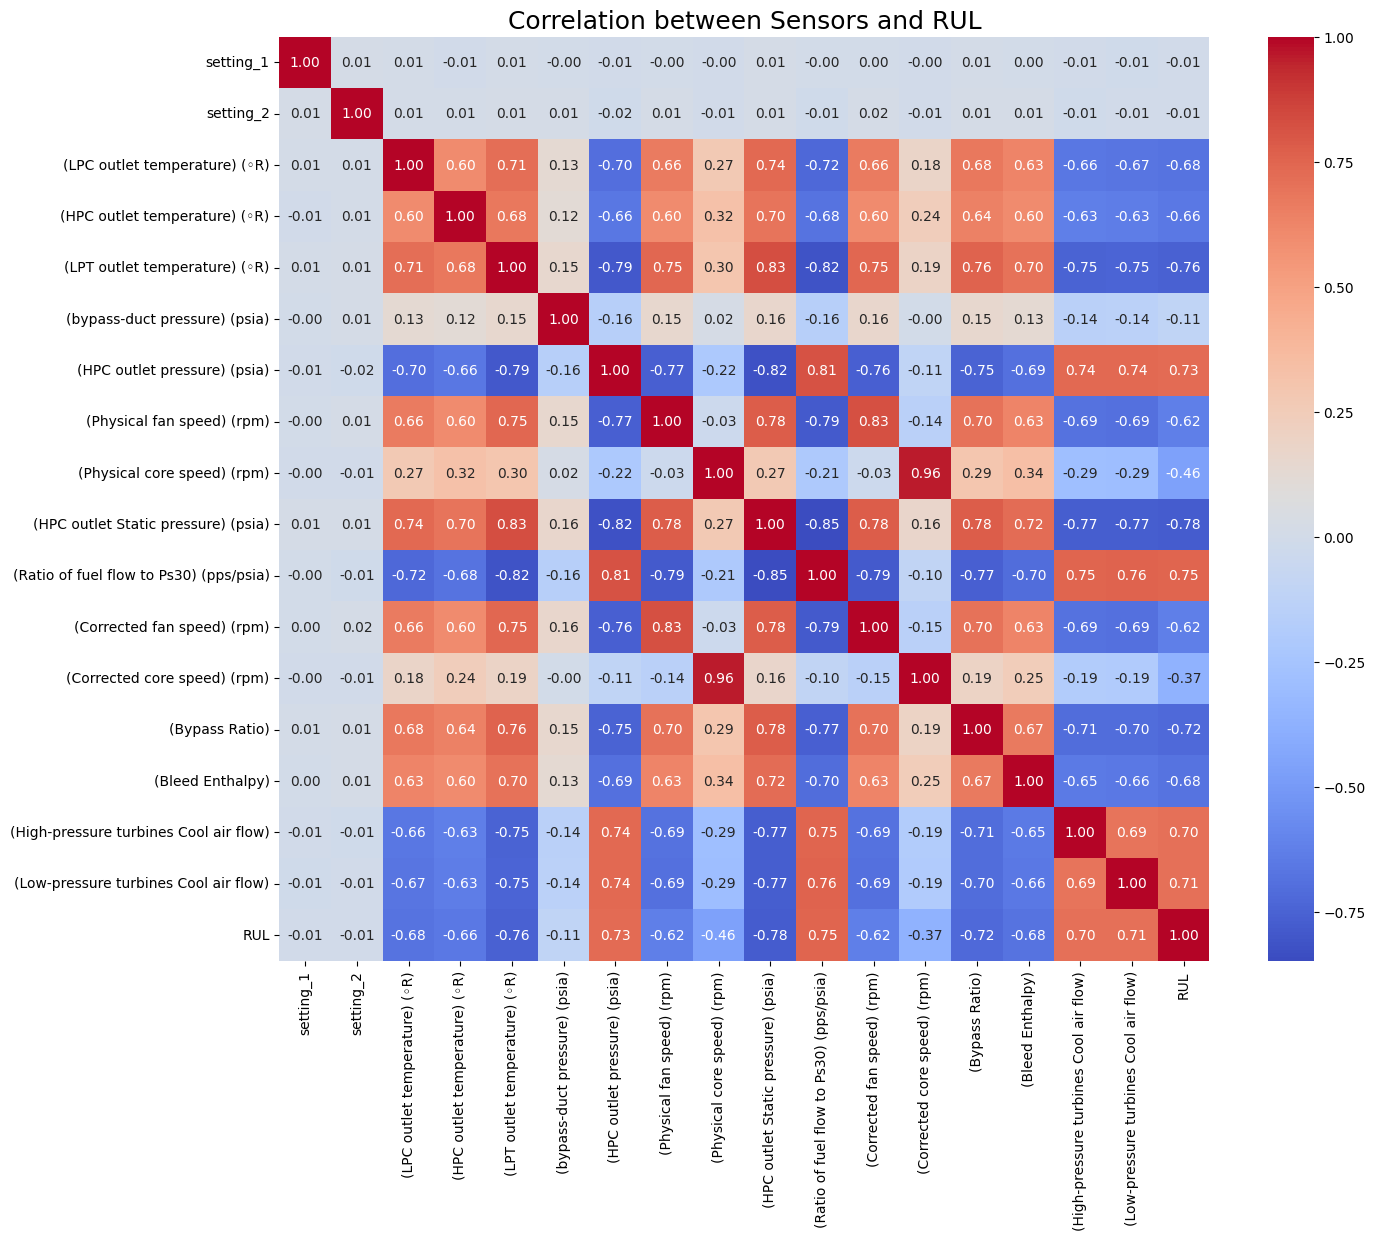

In [32]:
plt.figure(figsize=(15,12))
sns.heatmap(df_train[sensor_cols + ['RUL']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation between Sensors and RUL", fontsize=18)
plt.show()

In [ ]:
df_train.to_csv("fd003_df_train.csv", index=False)  
df_test.to_csv("fd003_df_test.csv", index=False)   
